# Auteur : Firmin ATCHAGAKO
# Date : 20/09/2024

########################################################################################################################################################

**Description du Projet** : Agriculture

L'agriculture est l'art et la science de cultiver la terre, de faire pousser des cultures et d'élever du bétail.
C'est le processus de production de nourriture, de fibres et de nombreux autres produits par la culture de certaines plantes.
L'agriculture permet de réduire notre dépendance vis-à-vis des autres pays, en fournissant de la nourriture, des revenus aux agriculteurs, et des recettes au gouvernement

**Contexte**

L'agriculture joue un rôle essentiel dans l'économie et la sécurité alimentaire des nations. Toutefois, le succès de la production agricole dépend de nombreux facteurs environnementaux et climatiques, tels que la pluviométrie, la température, la composition du sol, et la disponibilité des nutriments comme l'azote. Chaque culture nécessite des conditions spécifiques pour prospérer, et une mauvaise adéquation entre les cultures et les conditions locales peut entraîner des rendements réduits.

Dans un contexte de changement climatique et de variabilité croissante des conditions météorologiques, il devient crucial de pouvoir prédire quelle culture sera la plus adaptée à un environnement donné. L'utilisation de l'analyse de données et des algorithmes de machine learning, tels que le clustering et la classification, offre une opportunité de mieux comprendre ces relations complexes et de proposer des recommandations basées sur des données.

Ce projet vise à analyser un ensemble de données agricoles comprenant des paramètres tels que la pluviométrie, le taux d'azote dans le sol, la température, l'humidité, et d'autres caractéristiques agronomiques. L'objectif est de regrouper des zones similaires en fonction de ces paramètres et de prédire quelles cultures seraient les mieux adaptées à chaque zone, en optimisant ainsi la productivité et en minimisant les pertes agricoles.

Ce contexte met en avant les enjeux liés à l’agriculture moderne, notamment l'importance d’une approche basée sur les données pour maximiser les rendements agricoles en fonction des conditions environnementales.

**Objectifs du Projet**

En analysant différentes conditions climatiques et du sol, nous utiliserons le clustering K-means pour former des groupes (clusters) d'environnements agricoles similaires.
Nous réaliserons une classification multi-classe pour prédire quelles cultures peuvent être cultivées dans ces différentes conditions.
########################################################################################################################################################


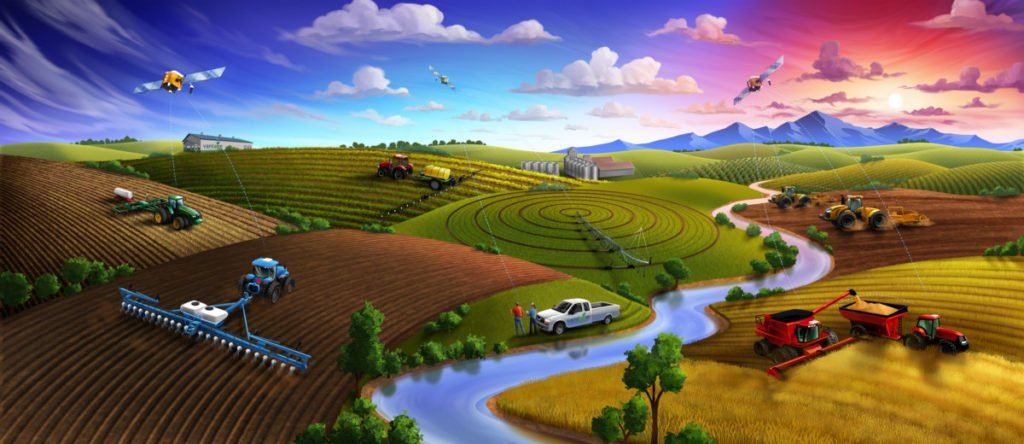

In [2]:
from IPython.display import Image, display
display(Image(r'C:\Users\User\Desktop\Training_ML\Application\Agricultural Production\1.jpg'))

**I. COLLECTE ET ANALYSE EXPLORATOIRE DES DONNEES**

In [1]:
#1.Importation des bibliothéques

# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets
from ipywidgets import interact

In [2]:
# 2. Importer la base de données
data = pd.read_excel(r'C:\Users\User\Desktop\Training_ML\Application\Agricultural Production\data.xlsx')
# 3. Afficher les premières lignes du DataFrame
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# determinons la taille du dataset
# Notre data set contient 2200 lignes et 8 colonnes

print("Shape de la Dataset :", data.shape)

Shape de la Dataset : (2200, 8)


In [11]:
# determinons les noms des colonnes

print("Column names:", data.columns)

Column names: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [13]:
# Identifions le nombre de variables en fonction de types

data.dtypes.value_counts()

float64    4
int64      3
object     1
Name: count, dtype: int64

**Description de chaque colonne du jeu de données**

N : ratio de la teneur en azote dans le sol
P : ratio de la teneur en phosphore dans le sol
K : ratio de la teneur en potassium dans le sol
température : température en degrés Celsius
humidité : humidité relative en %
ph : valeur du pH du sol
pluviométrie : pluviométrie en mm

In [15]:
# determinons des valeurs manquantes

data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

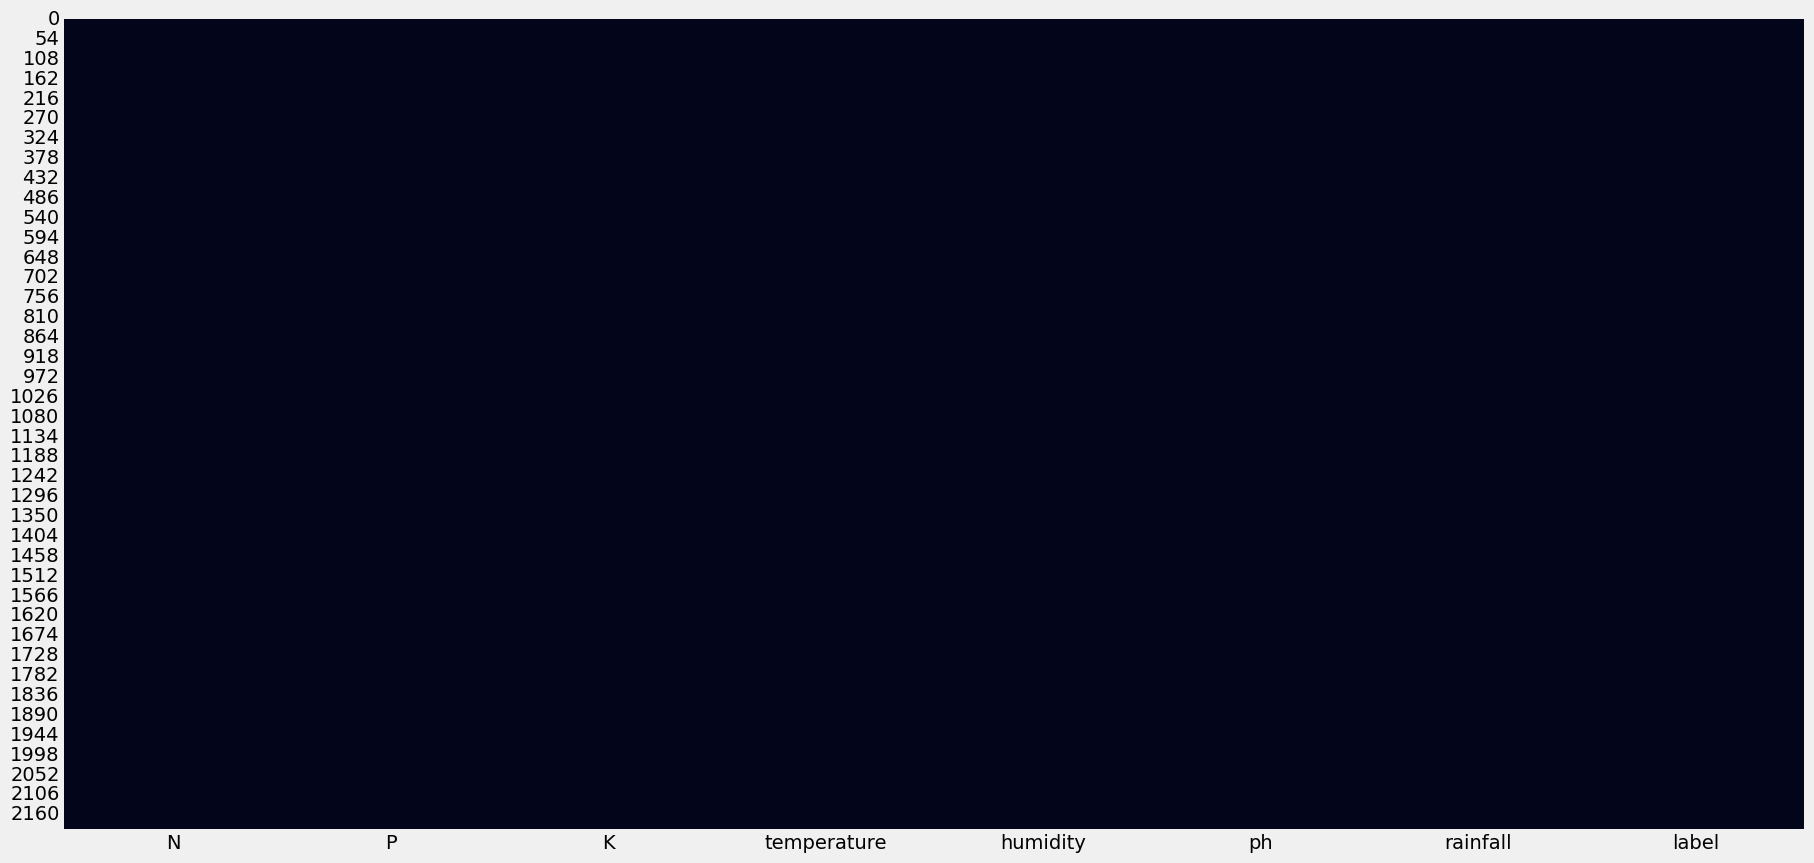

In [17]:
# affichons le datsent graphiquement dans seaborn, avec les valeurs na

plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar= False)
# Sur le paln graphique , nous pouvons conclure qu'il n'existe aucune valeur manquantes! nous allons le vérifir de plus prés.

In [19]:
##### determinons le pourcentage de valeurs manquantes dans notre dataset

(data.isna().sum()/ data.shape[0]).sort_values(ascending= True)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [21]:
# Vérifions les cultures présentes dans ce jeu de données
crops_count = data['label'].value_counts()
print(crops_count)

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [23]:
# Descriptive Statistics
# Determinons la moyenne de chacune des caractéristiques du sol et des conditions climatiques
# Vérifions le résumé pour toutes les cultures
print("Moyenne du ratio d'azote dans le sol : {0:.2f}".format(data['N'].mean()))
print("Moyenne du ratio de phosphore dans le sol : {0:.2f}".format(data['P'].mean()))
print("Moyenne du ratio de potassium dans le sol : {0:.2f}".format(data['K'].mean()))
print("Moyenne de la température en Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Moyenne de l'humidité relative en % : {0:.2f}".format(data['humidity'].mean()))
print("Moyenne de la valeur du pH du sol : {0:.2f}".format(data['ph'].mean()))
print("Moyenne de la pluviométrie en mm : {0:.2f}".format(data['rainfall'].mean()))

Moyenne du ratio d'azote dans le sol : 50.55
Moyenne du ratio de phosphore dans le sol : 53.36
Moyenne du ratio de potassium dans le sol : 48.15
Moyenne de la température en Celsius : 25.62
Moyenne de l'humidité relative en % : 71.48
Moyenne de la valeur du pH du sol : 6.47
Moyenne de la pluviométrie en mm : 103.46


In [25]:
@interact
def summary(cultures = list(data['label'].value_counts().index)):
    x = data[data['label'] == cultures]
    print("---------------------------------------------")
    print("Statistiques pour l'Azote")
    print("Azote minimum requis :", x['N'].min())
    print("Azote moyen requis :", x['N'].mean())
    print("Azote maximum requis :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistiques pour le Phosphore")
    print("Phosphore minimum requis :", x['P'].min())
    print("Phosphore moyen requis :", x['P'].mean())
    print("Phosphore maximum requis :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistiques pour le Potassium")
    print("Potassium minimum requis :", x['K'].min())
    print("Potassium moyen requis :", x['K'].mean())
    print("Potassium maximum requis :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistiques pour la Température")
    print("Température minimum requise : {0:.2f}".format(x['temperature'].min()))
    print("Température moyenne requise : {0:.2f}".format(x['temperature'].mean()))
    print("Température maximum requise : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistiques pour l'Humidité")
    print("Humidité minimum requise : {0:.2f}".format(x['humidity'].min()))
    print("Humidité moyenne requise : {0:.2f}".format(x['humidity'].mean()))
    print("Humidité maximum requise : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistiques pour le pH")
    print("pH minimum requis : {0:.2f}".format(x['ph'].min()))
    print("pH moyen requis : {0:.2f}".format(x['ph'].mean()))
    print("pH maximum requis : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistiques pour la Pluviométrie")
    print("Pluviométrie minimum requise : {0:.2f}".format(x['rainfall'].min()))
    print("Pluviométrie moyenne requise : {0:.2f}".format(x['rainfall'].mean()))
    print("Pluviométrie maximum requise : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='cultures', options=('rice', 'maize', 'jute', 'cotton', 'coconut', …

In [27]:
# Selection d'une condition spécifique (azote, phosphore, potassium, température, pH, humidité ou pluviométrie) et comparaison des moyennes de cette condition pour différentes cultures.
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [29]:
# Statistiques 
from ipywidgets import interact

@interact
def compare(conditions=['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    # Calculer la moyenne de la condition sélectionnée
    average_value = data[conditions].mean()
    
    print("Crops which require greater than average", conditions, '\n')
    # Filtrer les cultures avec des besoins supérieurs à la moyenne
    greater_than_average = data[data[conditions] > average_value]['label'].unique()
    print(greater_than_average)
    
    print("----------------------------------------------")
    
    print("Crops which require less than average", conditions, '\n')
    # Filtrer les cultures avec des besoins inférieurs ou égaux à la moyenne
    less_than_average = data[data[conditions] <= average_value]['label'].unique()
    print(less_than_average)


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

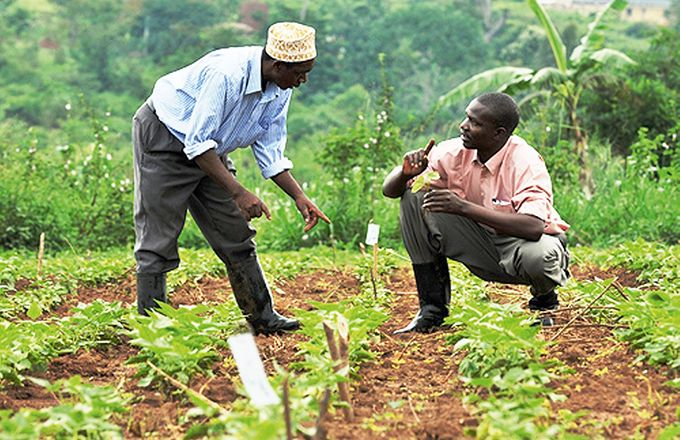

In [5]:
from IPython.display import Image, display
display(Image(r'C:\Users\User\Desktop\Training_ML\Application\Agricultural Production\2.jpg'))

**II. ANALYSE DES DONNES**

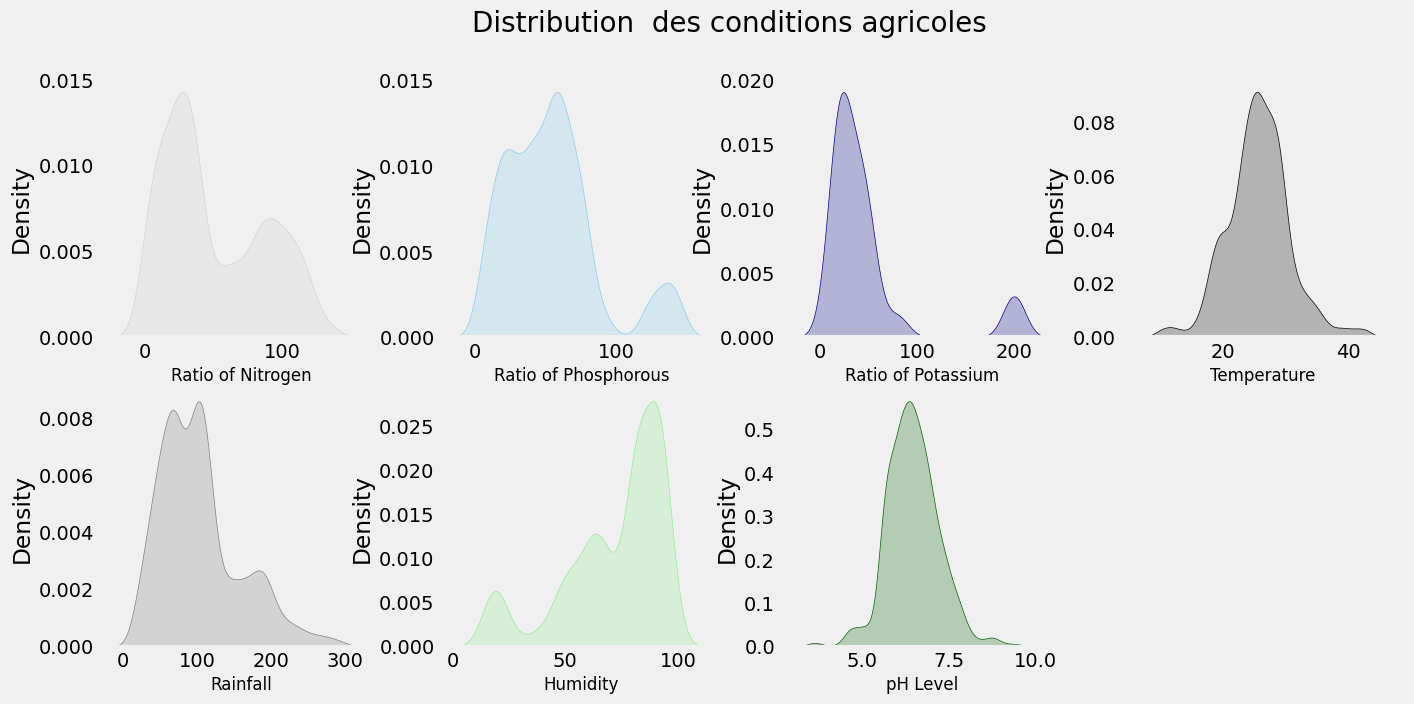

In [31]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.kdeplot(data['N'], color='lightgrey', fill=True)
plt.xlabel('Ratio of Nitrogen', fontsize=12)
plt.grid()

plt.subplot(2, 4, 2)
sns.kdeplot(data['P'], color='skyblue', fill=True)
plt.xlabel('Ratio of Phosphorous', fontsize=12)
plt.grid()

plt.subplot(2, 4, 3)
sns.kdeplot(data['K'], color='darkblue', fill=True)
plt.xlabel('Ratio of Potassium', fontsize=12)
plt.grid()

plt.subplot(2, 4, 4)
sns.kdeplot(data['temperature'], color='black', fill=True)
plt.xlabel('Temperature', fontsize=12)
plt.grid()

plt.subplot(2, 4, 5)
sns.kdeplot(data['rainfall'], color='grey', fill=True)
plt.xlabel('Rainfall', fontsize=12)
plt.grid()

plt.subplot(2, 4, 6)
sns.kdeplot(data['humidity'], color='lightgreen', fill=True)
plt.xlabel('Humidity', fontsize=12)
plt.grid()

plt.subplot(2, 4, 7)
sns.kdeplot(data['ph'], color='darkgreen', fill=True)
plt.xlabel('pH Level', fontsize=12)
plt.grid()

plt.suptitle('Distribution  des conditions agricoles', fontsize=20)
plt.show()


In [33]:
# Exploration des tendances qui pourraient être utiles pour la planification agricole.
#Découvrons quelques faits intéressants

print("Quelques modèles intéressants")
print("---------------------------------")
print("Cultures nécessitant un très haut ratio d'azote dans le sol :", data[data['N'] > 120]['label'].unique())
print("Cultures nécessitant un très haut ratio de phosphore dans le sol :", data[data['P'] > 100]['label'].unique())
print("Cultures nécessitant un très haut ratio de potassium dans le sol :", data[data['K'] > 200]['label'].unique())
print("Cultures nécessitant une très haute pluviométrie :", data[data['rainfall'] > 200]['label'].unique())
print("Cultures nécessitant une très basse température :", data[data['temperature'] < 10]['label'].unique())
print("Cultures nécessitant une très haute température :", data[data['temperature'] > 40]['label'].unique())
print("Cultures nécessitant une très basse humidité :", data[data['humidity'] < 20]['label'].unique())
print("Cultures nécessitant un très bas pH :", data[data['ph'] < 4]['label'].unique())
print("Cultures nécessitant un très haut pH :", data[data['ph'] > 9]['label'].unique())


Quelques modèles intéressants
---------------------------------
Cultures nécessitant un très haut ratio d'azote dans le sol : ['cotton']
Cultures nécessitant un très haut ratio de phosphore dans le sol : ['grapes' 'apple']
Cultures nécessitant un très haut ratio de potassium dans le sol : ['grapes' 'apple']
Cultures nécessitant une très haute pluviométrie : ['rice' 'papaya' 'coconut']
Cultures nécessitant une très basse température : ['grapes']
Cultures nécessitant une très haute température : ['grapes' 'papaya']
Cultures nécessitant une très basse humidité : ['chickpea' 'kidneybeans']
Cultures nécessitant un très bas pH : ['mothbeans']
Cultures nécessitant un très haut pH : ['mothbeans']


In [35]:
### Comprenons quelles cultures peuvent être cultivées uniquement en été, en hiver et pendant la saison des pluies

print("Cultures d'été")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Cultures d'hiver")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Cultures de pluie")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Cultures d'été
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Cultures d'hiver
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Cultures de pluie
['rice' 'papaya' 'coconut']


In [ ]:
# Regroupement de cultures similaires

In [ ]:
# grouping data points with similar  traits and assigning  them into clusters

In [37]:
# importation de la librairie warnings
import warnings 
warnings.filterwarnings('ignore')
# Selection des colonnes de la datasat
x = data.loc[:,['N','P','K','temperature','ph','humidity','rainfall']].values
# Deteminons la taille de X
print(x.shape)
# convertissons le X en datframe
x_data= pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,23.004459,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


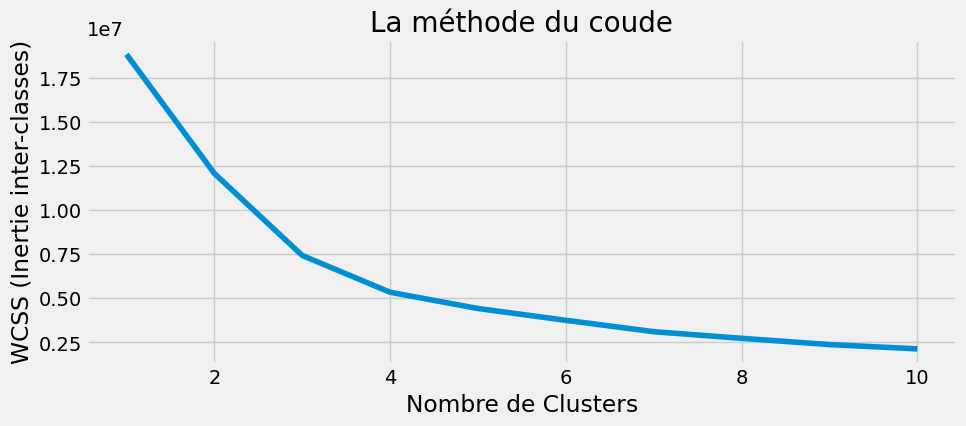

In [58]:
# Déterminons le nombre optimal de clusters dans le dataset

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Configuration de la taille de la figure
plt.rcParams['figure.figsize'] = (10, 4)

# Liste pour stocker les valeurs de l'inertie (WCSS)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)  
    wcss.append(km.inertia_)

# Tracons les résultats pour appliquer la méthode du coude
plt.plot(range(1, 11), wcss)
plt.title('La méthode du coude', fontsize=20)
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS (Inertie inter-classes)')
plt.show()

In [60]:
# Implémentons l'algorithme K-Means pour effectuer l'analyse de clustering
from sklearn.cluster import KMeans
import pandas as pd

km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)  
# Résultats de l'analyse de clustering
a = data['label']  
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)  # Fusionner les résultats du clustering avec les labels des cultures
z = z.rename(columns={0: 'cluster'})  # Renommer la colonne '0' en 'cluster'

# Vérifions les cultures dans chaque cluster
print("Résultats après l'application de l'analyse de clustering K-Means \n")
print("Cultures dans le premier cluster :", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Cultures dans le deuxième cluster :", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Cultures dans le troisième cluster :", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Cultures dans le quatrième cluster :", z[z['cluster'] == 3]['label'].unique())


Résultats après l'application de l'analyse de clustering K-Means 

Cultures dans le premier cluster : ['grapes' 'apple']
---------------------------------------------------------------
Cultures dans le deuxième cluster : ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Cultures dans le troisième cluster : ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Cultures dans le quatrième cluster : ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [62]:
# Clustering strict (Hard Clustering)
print("Résultats du Clustering strict\n")

# Cluster 1
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cultures dans le Cluster 1 :", list(d.index))
print("--------------------------------------------------")

# Cluster 2
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cultures dans le Cluster 2 :", list(d.index))
print("--------------------------------------------------")

# Cluster 3
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cultures dans le Cluster 3 :", list(d.index))
print("--------------------------------------------------")

# Cluster 4
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Cultures dans le Cluster 4 :", list(d.index))


Résultats du Clustering strict

Cultures dans le Cluster 1 : ['grapes', 'apple']
--------------------------------------------------
Cultures dans le Cluster 2 : ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Cultures dans le Cluster 3 : ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Cultures dans le Cluster 4 : ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


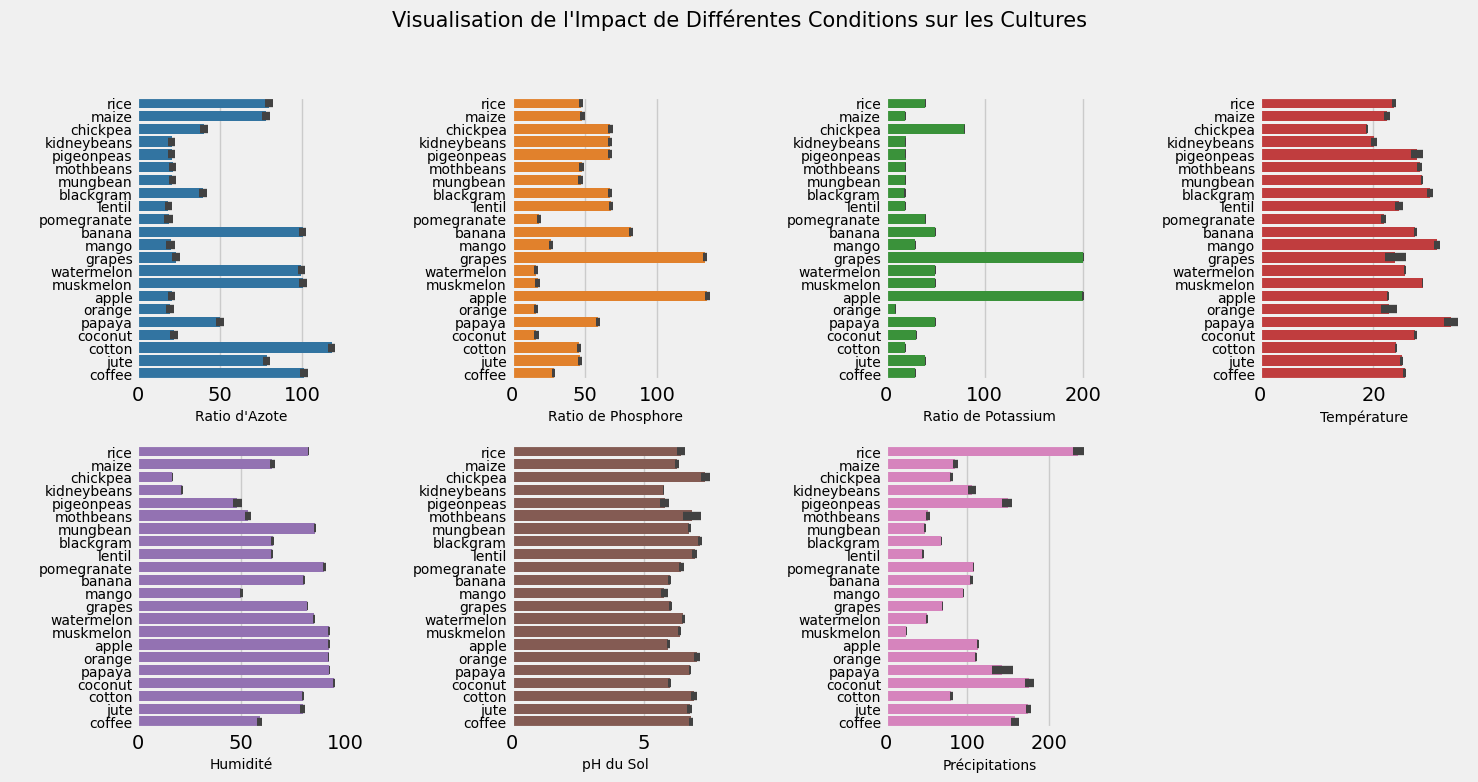

In [64]:
# Visualisation des Données

plt.rcParams['figure.figsize'] = (15, 8)

# Liste des couleurs à utiliser pour chaque graphique
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Graphique 1 : Ratio d'Azote
plt.subplot(2, 4, 1)
sns.barplot(x='N', y='label', data=data, palette=[colors[0]])
plt.ylabel(' ')
plt.xlabel('Ratio d\'Azote', fontsize=10)
plt.yticks(fontsize=10)

# Graphique 2 : Ratio de Phosphore
plt.subplot(2, 4, 2)
sns.barplot(x='P', y='label', data=data, palette=[colors[1]])
plt.ylabel(' ')
plt.xlabel('Ratio de Phosphore', fontsize=10)
plt.yticks(fontsize=10)

# Graphique 3 : Ratio de Potassium
plt.subplot(2, 4, 3)
sns.barplot(x='K', y='label', data=data, palette=[colors[2]])
plt.ylabel(' ')
plt.xlabel('Ratio de Potassium', fontsize=10)
plt.yticks(fontsize=10)

# Graphique 4 : Température
plt.subplot(2, 4, 4)
sns.barplot(x='temperature', y='label', data=data, palette=[colors[3]])
plt.ylabel(' ')
plt.xlabel('Température', fontsize=10)
plt.yticks(fontsize=10)

# Graphique 5 : Humidité
plt.subplot(2, 4, 5)
sns.barplot(x='humidity', y='label', data=data, palette=[colors[4]])
plt.ylabel(' ')
plt.xlabel('Humidité', fontsize=10)
plt.yticks(fontsize=10)

# Graphique 6 : pH du Sol
plt.subplot(2, 4, 6)
sns.barplot(x='ph', y='label', data=data, palette=[colors[5]])
plt.ylabel(' ')
plt.xlabel('pH du Sol', fontsize=10)
plt.yticks(fontsize=10)

# Graphique 7 : Précipitations
plt.subplot(2, 4, 7)
sns.barplot(x='rainfall', y='label', data=data, palette=[colors[6]])
plt.ylabel(' ')
plt.xlabel('Précipitations', fontsize=10)
plt.yticks(fontsize=10)

# Titre pour l'ensemble du graphique
plt.suptitle('Visualisation de l\'Impact de Différentes Conditions sur les Cultures', fontsize=15)

# Affichage des graphiques
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
### Predictive Modelling

In [66]:
# Divisons le Dataset pour la Modélisation Prédictive

# Variable cible
y = data['label']  # 'label' est la variable que vous souhaitez prédire

# Variables d'entrée (caractéristiques)
x = data.drop(['label'], axis=1)  # Suppression de la colonne 'label' du dataset

# Affichage des dimensions des variables d'entrée et de sortie
print("Dimension de x :", x.shape)  # Affiche la forme de x (nombre d'échantillons, nombre de caractéristiques)
print("Dimension de y :", y.shape)  # Affiche la forme de y (nombre d'échantillons,)


Dimension de x : (2200, 7)
Dimension de y : (2200,)


In [68]:
# Créons des Ensembles d'Entraînement et de Test pour la Validation des Résultats
from sklearn.model_selection import train_test_split

# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimension de x_train :", x_train.shape)  # Dimensions de l'ensemble d'entraînement des caractéristiques
print("Dimension de x_test :", x_test.shape)    # Dimensions de l'ensemble de test des caractéristiques
print("Dimension de y_train :", y_train.shape)  # Dimensions de l'ensemble d'entraînement des cibles
print("Dimension de y_test :", y_test.shape)    # Dimensions de l'ensemble de test des cibles


Dimension de x_train : (1760, 7)
Dimension de x_test : (440, 7)
Dimension de y_train : (1760,)
Dimension de y_test : (440,)


In [70]:
# Créons un Modèle Prédictif

from sklearn.linear_model import LogisticRegression

# Initialisation du modèle de régression logistique
model = LogisticRegression(max_iter=1000)  # max_iter augmente le nombre maximum d'itérations pour la convergence

# Entraînement du modèle avec l'ensemble d'entraînement
model.fit(x_train, y_train)

# Prédiction des étiquettes pour l'ensemble de test
y_pred = model.predict(x_test)


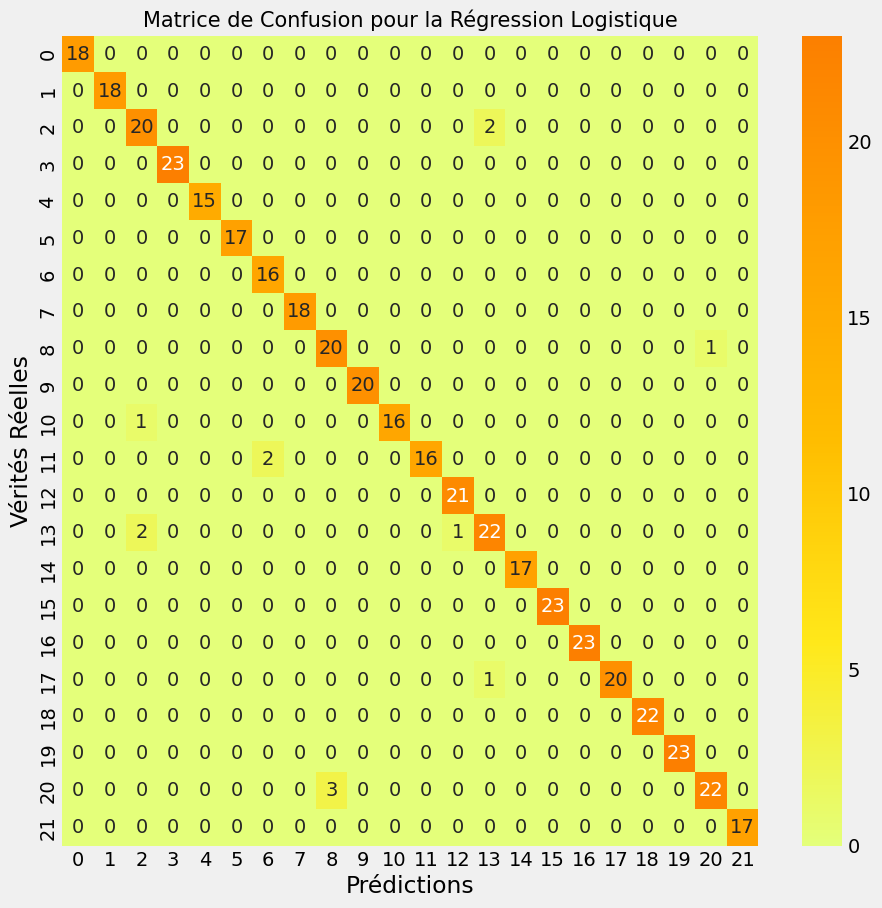

Rapport de Classification :
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.87      0.91      0.89        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.94      0.97        17
       maize       1.00      0.89      0.94        18
       mango       0.95      1.00      0.98        21
   mothbeans       0.88      0.88      0.88        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        2

In [72]:
# Évaluons la Performance du Modèle
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Affichons d'abord la matrice de confusion
plt.rcParams['figure.figsize'] = (10, 10)  # Taille de la figure
cm = confusion_matrix(y_test, y_pred)  # Calcul de la matrice de confusion
sns.heatmap(cm, annot=True, cmap='Wistia', fmt='g')  # Visualisation de la matrice de confusion
plt.title('Matrice de Confusion pour la Régression Logistique', fontsize=15)  # Titre
plt.xlabel('Prédictions')  # Étiquette de l'axe X
plt.ylabel('Vérités Réelles')  # Étiquette de l'axe Y
plt.show()  # Affichage du graphique

# Affichons également le Rapport de Classification
cr = classification_report(y_test, y_pred)  # Calcul du rapport de classification
print("Rapport de Classification :\n", cr)  # Affichage du rapport

**Résumé des Classes**

Classes avec une performance parfaite : apple, banana, chickpea, coconut, coffee, grapes, kidneybeans, mungbean, muskmelon, orange, pigeonpeas, pomegranate, watermelon (précision, rappel et F1-score tous à 1.00).
Classes avec des résultats solides mais quelques erreurs :
blackgram : précision de 0.87, rappel de 0.91, F1-score de 0.89 (22 instances, il y a donc quelques confusions).
cotton : précision de 0.89, rappel de 1.00, F1-score de 0.94 (il y a des faux positifs).
rice : précision de 0.96, rappel de 0.88, F1-score de 0.92 (un bon équilibre, mais quelques cas mal classés).
Classes avec de bonnes performances : mothbeans : précision de 0.88, rappel de 0.88, F1-score de 0.88 (indiquant des confusions possibles).
Performance Générale
Exactitude (Accuracy) : L'exactitude globale du modèle est de 0.97, ce qui signifie que le modèle a correctement classé 97 % des instances.
Moyenne Macro : 0.97 pour la précision, le rappel et le F1-score, ce qui indique une performance cohérente entre les différentes classes.
Moyenne Pondérée : 0.97, qui prend en compte le support de chaque classe.
Conclusion
Le modèle de régression logistique présente de très bonnes performances globales, avec une grande majorité des classes classées avec précision. Cependant, il existe des opportunités d'amélioration pour certaines classes, notamment celles qui affichent des scores légèrement inférieurs. Il peut être intéressant d'explorer d'autres modèles ou d'ajuster les paramètres pour améliorer encore la performance des classes moins bien classées.